# Define the CBOWDataset

In [9]:
torch.manual_seed(42)
dataset    = CBOWDataset.load_df_and_make_vectorizer(df_all)
dataloader = DataLoader(dataset = dataset,
                        batch_size = 128,
                        shuffle    = True,
                        drop_last  = True)
vectorizer = dataset.get_vectorizer()

In [10]:
print('The number of tokens in cbow_vocab (used as vocabulary_size in nn.Embedding)')
print(len(vectorizer.cbow_vocab._token_to_idx))
print(len(vectorizer.cbow_vocab))

The number of tokens in cbow_vocab (used as vocabulary_size in nn.Embedding)
6138
6138


In [11]:
one_batch = next(iter(dataloader))
print(f"The shape of input data - a batch of x_data: {one_batch['x_data'].shape}")

pd.DataFrame(one_batch['x_data'].numpy()).to_csv('x_data.csv')
print("x_data (as pd.DataFrame)")
pd.DataFrame(one_batch['x_data'].numpy())

The shape of input data - a batch of x_data: torch.Size([128, 6])
x_data (as pd.DataFrame)


,0,1,2,3,4,5
0,48,173,472,15,0,0
1,1495,53,60,331,36,0
2,226,334,290,1030,482,34
3,551,204,85,0,0,0
4,2,36,1214,1233,15,43
...,...,...,...,...,...,...
123,174,620,115,88,43,0
124,264,2124,326,2284,0,0
125,2,1570,1571,4,796,985
126,137,2579,1406,1458,96,4277


# Define the CBOWClassifier

In [12]:
classifier = CBOWClassifier(vocabulary_size = len(vectorizer.cbow_vocab), 
                            embedding_size  = args.embedding_size, 
                            padding_idx     = 0)
classifier

CBOWClassifier(
  (embedding): Embedding(6138, 50, padding_idx=0)
  (fc1): Linear(in_features=50, out_features=6138, bias=True)
)

### The embedding weights 

In [13]:
print("The embedding weights (initialized)")
print("Shape:")
print(classifier.embedding.weight.shape)
print('-'*100)
print(classifier.embedding.weight)

The embedding weights (initialized)
Shape:
torch.Size([6138, 50])
----------------------------------------------------------------------------------------------------
Parameter containing:
tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.8140, -0.7360, -0.8371,  ...,  0.5832,  1.0669, -0.4502],
        [-0.6788,  0.5743,  0.1877,  ...,  0.1043,  1.0414, -0.3997],
        ...,
        [-0.0856,  0.2704,  1.3464,  ..., -0.7433, -0.1588,  1.1350],
        [-1.2199, -0.3144, -0.4734,  ..., -0.4172, -0.5126, -0.0513],
        [-0.3910,  0.6709,  2.3934,  ...,  0.4753, -1.8286, -1.1623]],
       requires_grad=True)


In [14]:
pd.DataFrame(classifier.embedding.weight.detach().numpy()).to_csv('embedding_weight.csv')
print("embedding.weight (as pd.DataFrame)")
pd.DataFrame(classifier.embedding.weight.detach().numpy())


embedding.weight (as pd.DataFrame)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.814008,-0.735993,-0.837125,-0.922390,1.811318,0.160565,-0.097807,1.844594,-1.184537,1.383549,...,1.334703,0.483539,-0.197562,1.268311,1.224263,0.098117,0.640755,0.583247,1.066927,-0.450153
2,-0.678753,0.574316,0.187749,-0.357623,0.264910,1.273168,-0.001311,-0.303604,-0.986439,0.123299,...,0.217553,-0.046655,-1.433521,-0.566527,0.269482,-0.210376,-0.732803,0.104298,1.041401,-0.399731
3,-2.293334,0.497563,-2.480120,-0.417544,-1.195454,0.812337,-0.306278,-0.330158,-0.980803,0.194734,...,0.466404,0.666725,-1.175334,0.358057,0.478768,1.353700,-0.159331,-0.424944,0.944231,-0.184935
4,0.185161,1.068692,1.306534,0.459835,0.261778,-0.759935,-2.046139,-1.529453,0.154316,0.440767,...,-0.871889,-0.027118,-0.353246,1.463857,0.172902,1.051363,0.007491,-0.077365,0.539731,0.565505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6133,0.068019,0.948814,-0.204411,-2.082099,0.512110,-0.145882,-0.314044,-1.684365,-0.593125,-0.739254,...,0.005227,-0.130779,0.437420,-0.637401,-0.838377,1.216650,-0.119026,0.293181,-0.918303,0.182565
6134,-0.298037,0.303453,-0.310113,0.423315,1.453353,0.068873,-0.945123,1.421699,-1.001067,0.931926,...,-0.002716,-1.050627,-0.734116,1.094205,-0.734340,-1.173488,-0.130324,0.642628,-1.818609,-0.084423
6135,-0.085554,0.270371,1.346431,-1.169010,0.203191,1.976634,0.985795,0.964377,-2.089948,-0.110125,...,0.313188,0.984082,1.676302,0.757100,1.089941,-0.079902,-0.881911,-0.743326,-0.158781,1.135047
6136,-1.219913,-0.314420,-0.473383,0.081901,-0.297230,2.318703,0.778795,-0.022744,0.217141,-1.129814,...,1.111356,-0.526116,0.800503,0.373026,0.051993,0.799122,0.100437,-0.417210,-0.512576,-0.051260


# Embedding Results

In [15]:
embedding_results = classifier.embedding(one_batch['x_data'])
print(f"The shape of output data - classifier.embedding(x_input): {embedding_results.shape}")
print('-'*100)
print("embedding_results:")
print(embedding_results)

The shape of output data - classifier.embedding(x_input): torch.Size([128, 6, 50])
----------------------------------------------------------------------------------------------------
embedding_results:
tensor([[[ 1.3094e+00, -7.2855e-02,  1.1227e+00,  ..., -8.1594e-02,
           1.3450e+00, -1.2653e+00],
         [-1.0847e-01, -6.1221e-01,  2.4796e-01,  ...,  1.2712e-01,
           4.2209e+00, -1.9402e+00],
         [ 7.8926e-01,  1.6959e+00,  1.5105e-02,  ...,  2.3107e-01,
           1.9403e-01, -1.5303e-01],
         [-5.1238e-01,  5.5741e-01,  1.1820e+00,  ..., -3.8926e-01,
           6.1381e-01, -2.7863e-01],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00]],

        [[ 1.2393e+00,  2.4113e-01,  5.3200e-01,  ..., -1.1304e+00,
           6.3180e-01, -1.8669e+00],
         [ 4.2931e-01,  7.1228e-02, -1.3468e+00,  ..., -3.77

### The embedding output of the second element
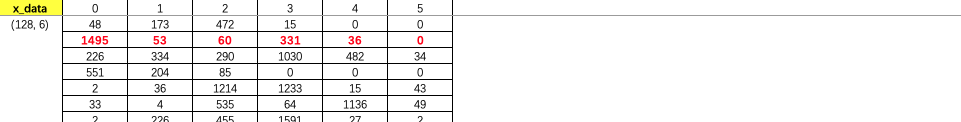

In [16]:
print(embedding_results[1])

tensor([[ 1.2393,  0.2411,  0.5320, -0.2306,  0.3802,  0.5463,  0.4346, -0.8531,
         -1.4338, -1.5024, -0.0158, -1.3305, -0.4999, -0.5280,  0.7297, -1.5229,
          0.4747, -1.9932,  0.1734, -0.4299, -0.1880, -0.6436,  0.6213, -2.1057,
         -0.0455, -0.5918, -0.0500, -0.7026, -1.2240,  0.4527,  0.6768,  0.2802,
         -1.2191, -1.1735,  0.5780,  1.2764, -1.5325,  1.1548, -1.0539, -1.2349,
          0.5874, -0.9133, -0.3131, -1.0003, -0.9190, -1.3245, -0.7689, -1.1304,
          0.6318, -1.8669],
        [ 0.4293,  0.0712, -1.3468,  0.8581, -0.1779,  0.8002, -0.5898, -0.1646,
         -0.4931,  0.5041,  0.9985,  0.0367,  0.2298, -1.9846, -0.1796,  0.8974,
          0.0517, -0.5315,  0.5726,  0.3863,  0.2722,  0.4613, -0.1993,  0.4683,
          1.0864, -0.4892,  1.7520, -0.3744,  0.9508,  1.3072,  1.1309, -0.1208,
          1.6047,  0.0861,  1.9344, -0.4456, -0.4748, -0.3026,  1.2402, -0.6573,
          1.8484, -1.1966, -0.4228, -0.7323, -0.3979, -0.0050, -0.3179, -0.3774,


In [17]:
### As pd.DataFrame
pd.DataFrame(embedding_results.detach().numpy()[1])

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.239317,0.241133,0.531997,-0.230551,0.380223,0.546306,0.434564,-0.853082,-1.433776,-1.502403,...,0.587424,-0.913328,-0.313130,-1.000293,-0.918973,-1.324456,-0.768889,-1.130381,0.631798,-1.866947
1,0.429310,0.071228,-1.346822,0.858129,-0.177919,0.800221,-0.589756,-0.164609,-0.493096,0.504085,...,1.848445,-1.196616,-0.422818,-0.732266,-0.397939,-0.004984,-0.317894,-0.377366,2.260444,-0.330952
2,-0.281071,1.725346,0.126995,-0.881029,1.821829,1.586380,0.865519,-0.276548,0.865267,0.982320,...,0.158243,-1.742975,-1.293895,1.307457,-0.876912,-0.015859,1.608760,-0.429775,-0.077568,-0.501457
3,0.361435,-0.473370,-0.440048,-0.538621,-0.082562,-1.183887,-0.668642,-1.324762,-0.430468,0.202137,...,-0.196769,-0.916744,-0.674305,-0.647150,0.467972,0.576771,-0.807757,1.468199,-0.865106,-0.703566
4,0.289230,0.351967,2.098779,-0.528568,-0.465872,0.491641,-0.265838,0.725578,0.587680,0.183979,...,0.020343,0.928909,-0.923892,1.147384,0.941576,0.441419,1.658072,0.253133,-0.101760,-0.966339
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### The results are elememts in embedding.weight corresponding to the index of the second element

In [18]:
classifier.embedding.weight[1495]

tensor([ 1.2393,  0.2411,  0.5320, -0.2306,  0.3802,  0.5463,  0.4346, -0.8531,
        -1.4338, -1.5024, -0.0158, -1.3305, -0.4999, -0.5280,  0.7297, -1.5229,
         0.4747, -1.9932,  0.1734, -0.4299, -0.1880, -0.6436,  0.6213, -2.1057,
        -0.0455, -0.5918, -0.0500, -0.7026, -1.2240,  0.4527,  0.6768,  0.2802,
        -1.2191, -1.1735,  0.5780,  1.2764, -1.5325,  1.1548, -1.0539, -1.2349,
         0.5874, -0.9133, -0.3131, -1.0003, -0.9190, -1.3245, -0.7689, -1.1304,
         0.6318, -1.8669], grad_fn=<SelectBackward0>)

In [19]:
classifier.embedding.weight[53]

tensor([ 0.4293,  0.0712, -1.3468,  0.8581, -0.1779,  0.8002, -0.5898, -0.1646,
        -0.4931,  0.5041,  0.9985,  0.0367,  0.2298, -1.9846, -0.1796,  0.8974,
         0.0517, -0.5315,  0.5726,  0.3863,  0.2722,  0.4613, -0.1993,  0.4683,
         1.0864, -0.4892,  1.7520, -0.3744,  0.9508,  1.3072,  1.1309, -0.1208,
         1.6047,  0.0861,  1.9344, -0.4456, -0.4748, -0.3026,  1.2402, -0.6573,
         1.8484, -1.1966, -0.4228, -0.7323, -0.3979, -0.0050, -0.3179, -0.3774,
         2.2604, -0.3310], grad_fn=<SelectBackward0>)

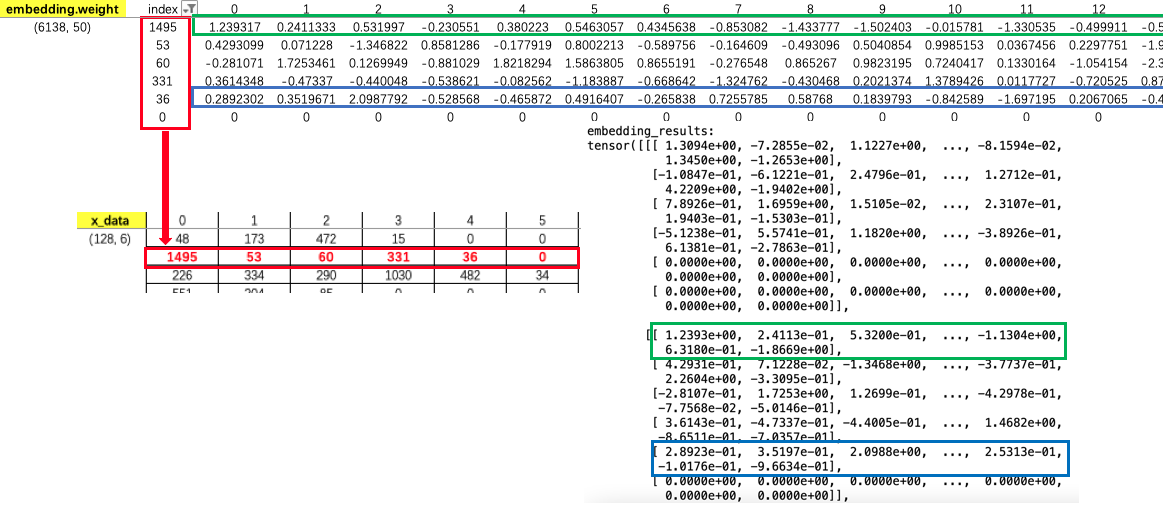

In [20]:
classifier.embedding.weight[1495]

tensor([ 1.2393,  0.2411,  0.5320, -0.2306,  0.3802,  0.5463,  0.4346, -0.8531,
        -1.4338, -1.5024, -0.0158, -1.3305, -0.4999, -0.5280,  0.7297, -1.5229,
         0.4747, -1.9932,  0.1734, -0.4299, -0.1880, -0.6436,  0.6213, -2.1057,
        -0.0455, -0.5918, -0.0500, -0.7026, -1.2240,  0.4527,  0.6768,  0.2802,
        -1.2191, -1.1735,  0.5780,  1.2764, -1.5325,  1.1548, -1.0539, -1.2349,
         0.5874, -0.9133, -0.3131, -1.0003, -0.9190, -1.3245, -0.7689, -1.1304,
         0.6318, -1.8669], grad_fn=<SelectBackward0>)

In [21]:
pd.DataFrame(embedding_results.detach().numpy()[1])

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.239317,0.241133,0.531997,-0.230551,0.380223,0.546306,0.434564,-0.853082,-1.433776,-1.502403,...,0.587424,-0.913328,-0.313130,-1.000293,-0.918973,-1.324456,-0.768889,-1.130381,0.631798,-1.866947
1,0.429310,0.071228,-1.346822,0.858129,-0.177919,0.800221,-0.589756,-0.164609,-0.493096,0.504085,...,1.848445,-1.196616,-0.422818,-0.732266,-0.397939,-0.004984,-0.317894,-0.377366,2.260444,-0.330952
2,-0.281071,1.725346,0.126995,-0.881029,1.821829,1.586380,0.865519,-0.276548,0.865267,0.982320,...,0.158243,-1.742975,-1.293895,1.307457,-0.876912,-0.015859,1.608760,-0.429775,-0.077568,-0.501457
3,0.361435,-0.473370,-0.440048,-0.538621,-0.082562,-1.183887,-0.668642,-1.324762,-0.430468,0.202137,...,-0.196769,-0.916744,-0.674305,-0.647150,0.467972,0.576771,-0.807757,1.468199,-0.865106,-0.703566
4,0.289230,0.351967,2.098779,-0.528568,-0.465872,0.491641,-0.265838,0.725578,0.587680,0.183979,...,0.020343,0.928909,-0.923892,1.147384,0.941576,0.441419,1.658072,0.253133,-0.101760,-0.966339
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
